In [1]:
import torch
import torch.nn as nn


device = 'cuda' if torch.cuda.is_available() else 'cpu'

Создадим простую трехслойную нейросеть

In [4]:
class NeuralNet(nn.Module):
  def __init__(self, dim=1):
    super(NeuralNet, self).__init__()

    self.fc1 = nn.Linear(dim, 5)
    self.tanh1 = nn.Tanh()

    self.fc2 = nn.Linear(5, 5)
    self.tanh2 = nn.Tanh()

    self.fc3 = nn.Linear(5, 1)
    self.tanh3 = nn.Tanh()

  def forward(self, x):
    x = self.fc1(x)
    x = self.tanh1(x)

    x = self.fc2(x)
    x = self.tanh2(x)

    x = self.fc3(x)
    x = self.tanh3(x)
    return x

In [6]:
SimpleNet = NeuralNet(1)
SimpleNet = SimpleNet.to(device)

Функция для обучения модели

In [12]:
import tqdm
from tqdm.auto import tqdm
def train(model, X, y, criterion, optimizer, num_epoch):
  for epoch in tqdm(range(num_epoch)):
    y_pred = model(X.to(device))

    loss = criterion(y_pred, y.to(device))
    if (epoch + 1) % 10 == 0:
      print(f'Epoch {epoch + 1} : loss {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return model

In [21]:
X = torch.linspace(-6, 6, 1000)
Y = torch.cos(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [27]:
X_train = X_train.view(-1, 1).to(device)
X_test = X_test.view(-1, 1).to(device)
y_train = y_train.view(-1, 1).to(device)
y_test = y_test.view(-1, 1).to(device)

In [28]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(SimpleNet.parameters(), lr=1e-2)

SimpleNet = train(SimpleNet, X_train, y_train, criterion, optimizer, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10 : loss 0.005002863239496946
Epoch 20 : loss 0.003847151529043913
Epoch 30 : loss 0.0034058818127959967
Epoch 40 : loss 0.003303784877061844
Epoch 50 : loss 0.003263593651354313
Epoch 60 : loss 0.0032222066074609756
Epoch 70 : loss 0.0031811492517590523
Epoch 80 : loss 0.003135422244668007
Epoch 90 : loss 0.003090265206992626
Epoch 100 : loss 0.003044245531782508


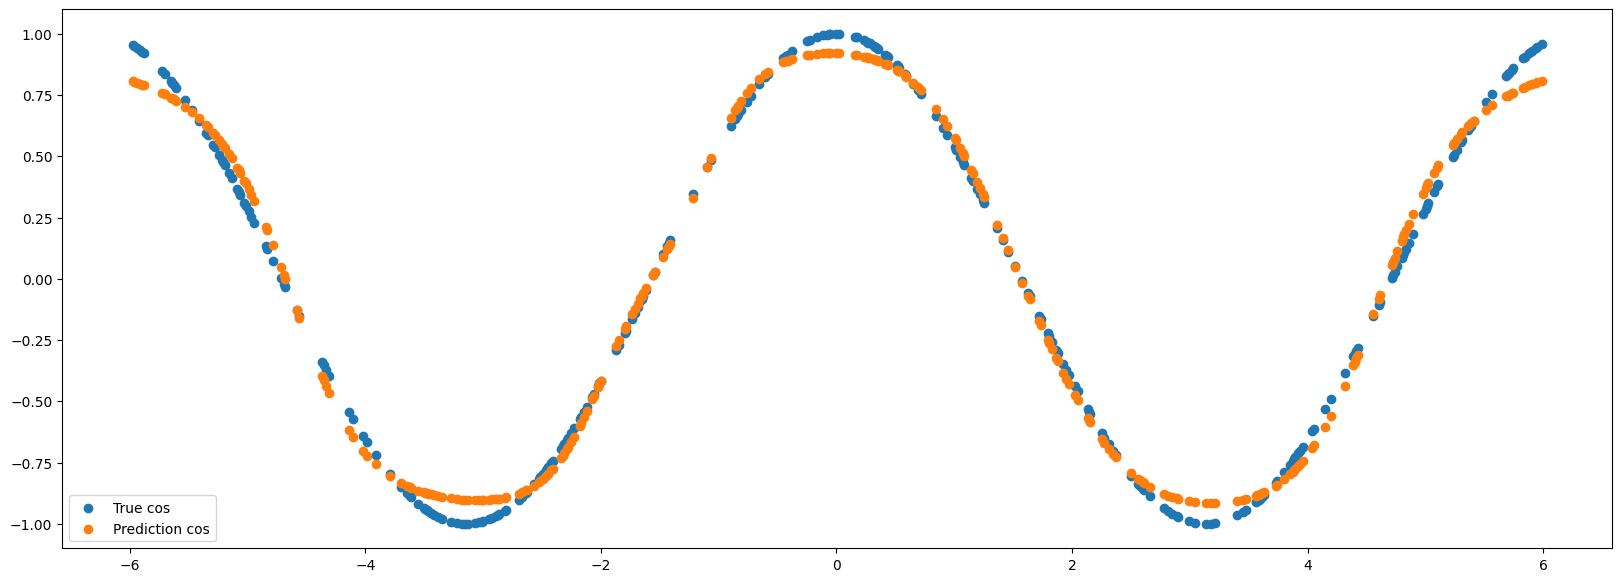

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = SimpleNet(X_test.view(-1, 1))
y_pred = y_pred.cpu().detach().numpy()

plt.figure(figsize=(20, 7))
plt.scatter(X_test.cpu(), y_test.cpu(), label='True cos')
plt.scatter(X_test.cpu(), y_pred, label='Prediction cos')
plt.legend()
plt.show()